# Demo of `SECoP-Ophyd` Integration 


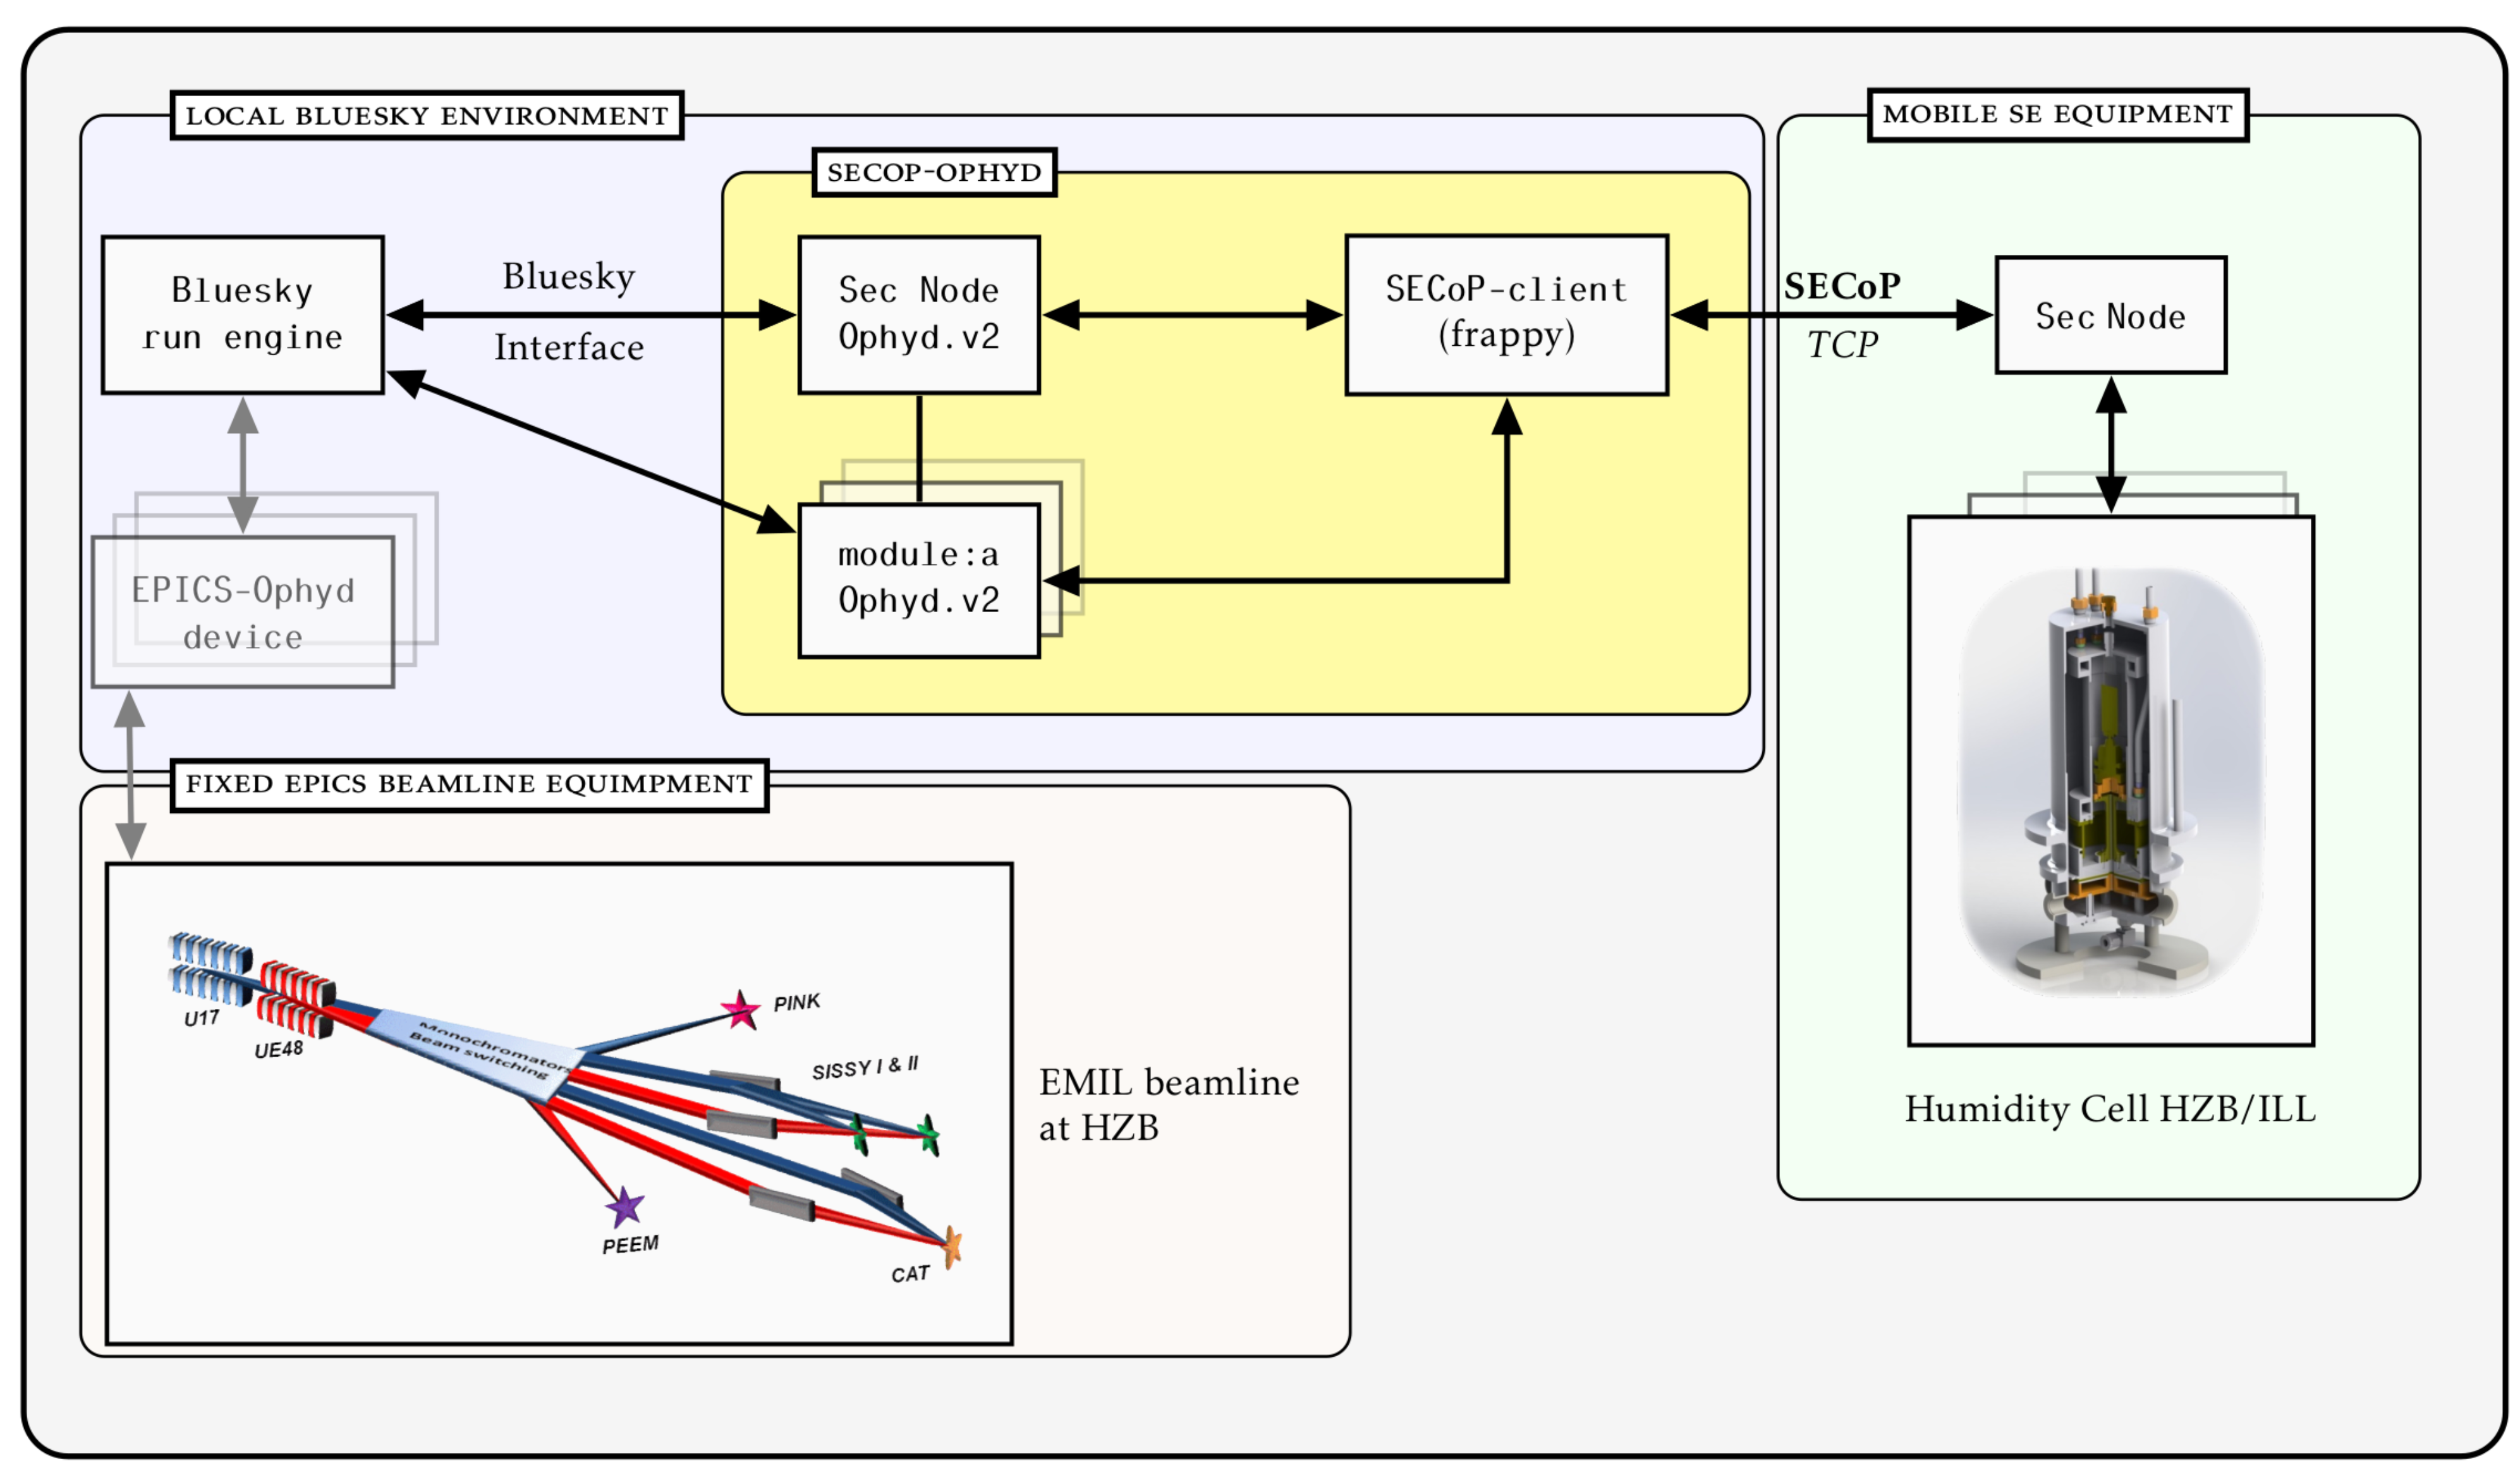

### Setting up Bluesky Environment 

In [ ]:
from databroker.v2 import temp
from bluesky import RunEngine, Msg
import bluesky.plan_stubs as bps
from bluesky.plans import count,list_scan,scan
import matplotlib.pyplot as plt
from bluesky.run_engine import get_bluesky_event_loop
from bluesky.callbacks.best_effort import BestEffortCallback
from pprint import pprint


import bluesky.preprocessors as bpp

from secop_ophyd.SECoPDevices import SECoP_Node_Device, SECoPReadableDevice, SECoPMoveableDevice, SECoP_CMD_Device

import random

from bluesky.utils import ProgressBarManager



# Create a run engine and a temporary file backed database. Send all the documents from the RE into that database
RE = RunEngine({},call_returns_result=True)
db = temp()
bec = BestEffortCallback()
RE.subscribe(bec)
RE.waiting_hook = ProgressBarManager()
RE.ignore_callback_exceptions = False
RE.subscribe(db.v1.insert)



#Example of adding metadata to RE environment
investigation_id = "kmnk2n34"

RE.md["investigation_id"] = investigation_id



### SECoP-Ophyd Device generation
the SECoP-Ophyd integration just needs IP adress and portnumber of the SEC node and build the device tree from the device description upon connection. 

In [ ]:


# Connect to SEC Node and generate ophyd device tree
cryo_node = await SECoP_Node_Device.create('localhost','10769',RE.loop)


# cryo node is only comprised of a single module: cryo
cryo:SECoPMoveableDevice= cryo_node.cryo




In [ ]:
# Metadata of all read-signals (For SECoP-Ophyd devices this is always only the 'value' Signal)
pprint(await cryo.describe())

In [ ]:
# Metadata of all configuration-signals
pprint(await cryo.describe_configuration())

### Readable

In [ ]:
# simple readout of the main signal 'value'
p = RE(count([cryo],10,0.5))

### Movable

In [ ]:
# Since the cryo device is a Movable Device, it can be  set to different setpoints (targets)
p = RE(scan([cryo],cryo,10,20,10))